In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

leases_df = pd.read_csv("Leases.csv")
occupancy_df = pd.read_csv("Major Market Occupancy Data.csv")
price_avail_df = pd.read_csv("Price and Availability Data.csv")
unemployment_df = pd.read_csv("Unemployment.csv")

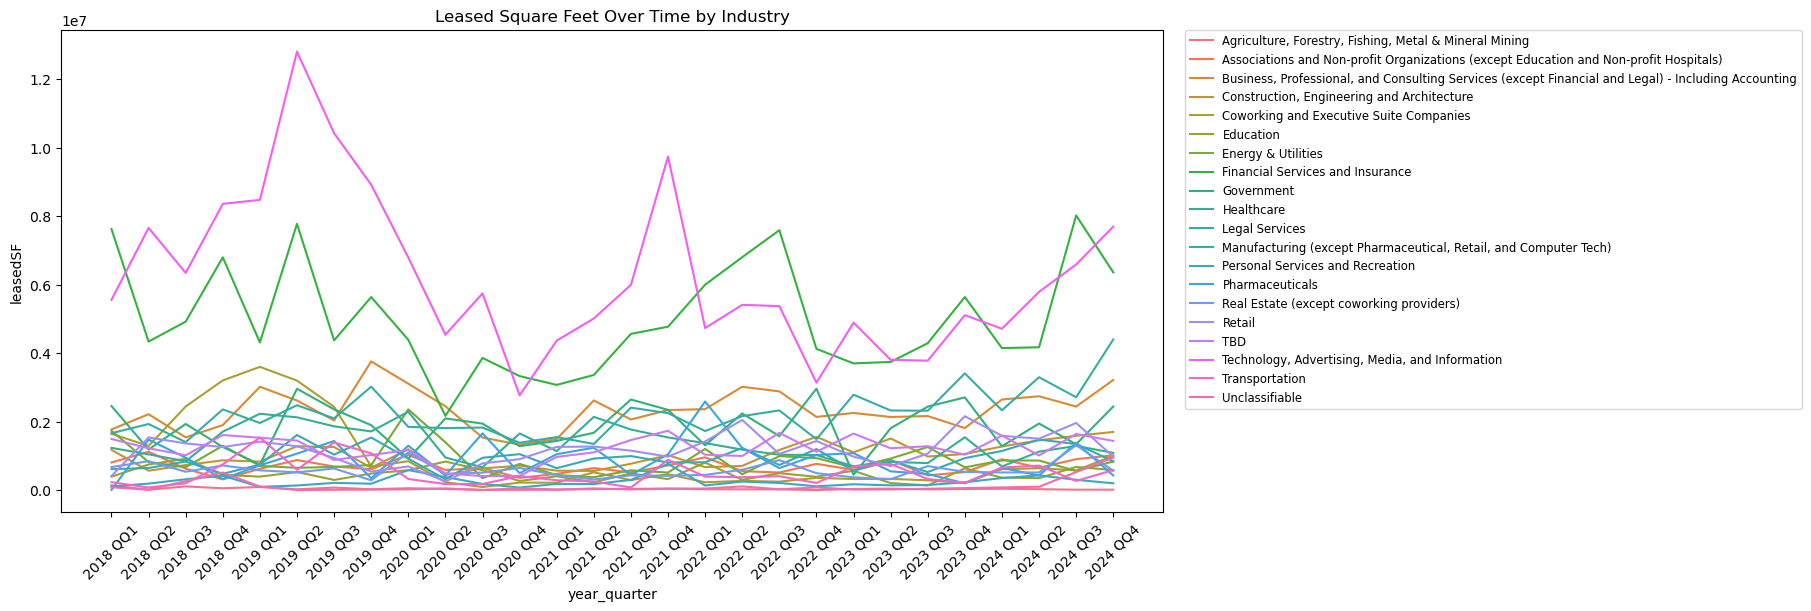

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

leases_df = pd.read_csv("Leases.csv")

plt.figure(figsize=(18,6), constrained_layout=True)  # Wider plot, auto layout
sns.lineplot(data=leases_by_industry, x='year_quarter', y='leasedSF', hue='internal_industry')

plt.xticks(rotation=45)
plt.title('Leased Square Feet Over Time by Industry')

# Move legend to right with smaller font and more space
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')

plt.show()

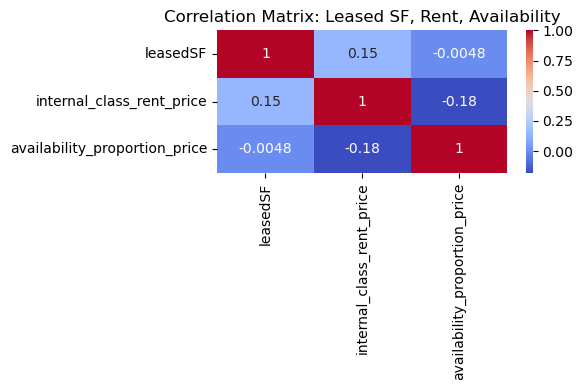

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
leases_df = pd.read_csv("Leases.csv")
price_avail_df = pd.read_csv("Price and Availability Data.csv")

# Merge datasets on common keys
merged_df = leases_df.merge(
    price_avail_df,
    on=['year', 'quarter', 'market', 'internal_class'],
    suffixes=('_lease', '_price')
)

# Select relevant columns and convert to numeric
cols = ['leasedSF', 'internal_class_rent_price', 'availability_proportion_price']
merged_df[cols] = merged_df[cols].apply(pd.to_numeric, errors='coerce')
merged_df = merged_df[cols].dropna()

# Correlation matrix
corr = merged_df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Leased SF, Rent, Availability')
plt.tight_layout()
plt.show()

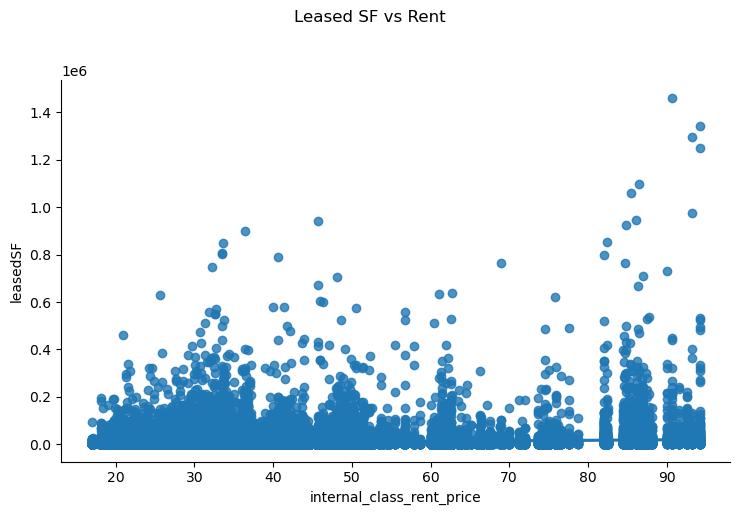

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
leases_df = pd.read_csv("Leases.csv")
price_avail_df = pd.read_csv("Price and Availability Data.csv")

# Merge datasets on common keys
merged_df = leases_df.merge(
    price_avail_df,
    on=['year', 'quarter', 'market', 'internal_class'],
    suffixes=('_lease', '_price')
)

# Select relevant columns and convert to numeric
cols = ['leasedSF', 'internal_class_rent_price', 'availability_proportion_price']
merged_df[cols] = merged_df[cols].apply(pd.to_numeric, errors='coerce')
merged_df = merged_df[cols].dropna()

# Scatter plot: Rent vs Leased SF
sns.lmplot(data=merged_df, x='internal_class_rent_price', y='leasedSF', height=5, aspect=1.5)
plt.suptitle('Leased SF vs Rent', y=1.02)
plt.tight_layout()
plt.show()

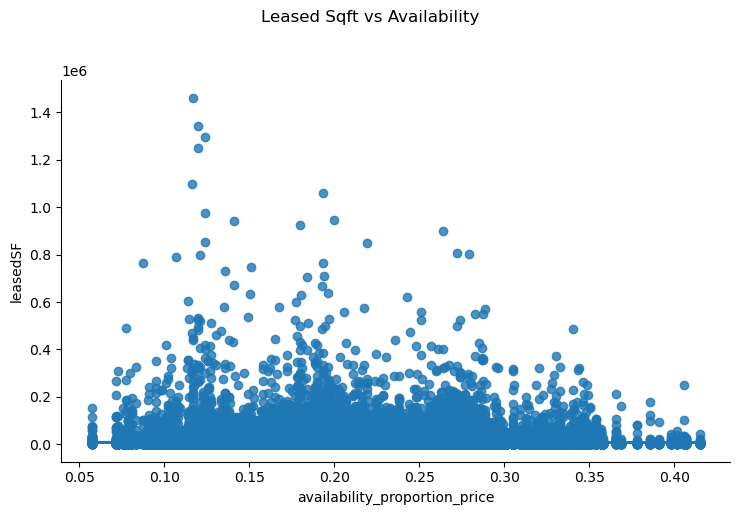

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
leases_df = pd.read_csv("Leases.csv")
price_avail_df = pd.read_csv("Price and Availability Data.csv")

# Merge datasets on common keys
merged_df = leases_df.merge(
    price_avail_df,
    on=['year', 'quarter', 'market', 'internal_class'],
    suffixes=('_lease', '_price')
)

# Select relevant columns and convert to numeric
cols = ['leasedSF', 'internal_class_rent_price', 'availability_proportion_price']
merged_df[cols] = merged_df[cols].apply(pd.to_numeric, errors='coerce')
merged_df = merged_df[cols].dropna()

# Scatter plot: Availability vs Leased SF
sns.lmplot(data=merged_df, x='availability_proportion_price', y='leasedSF', height=5, aspect=1.5)
plt.suptitle('Leased Sqft vs Availability', y=1.02)
plt.tight_layout()
plt.show()

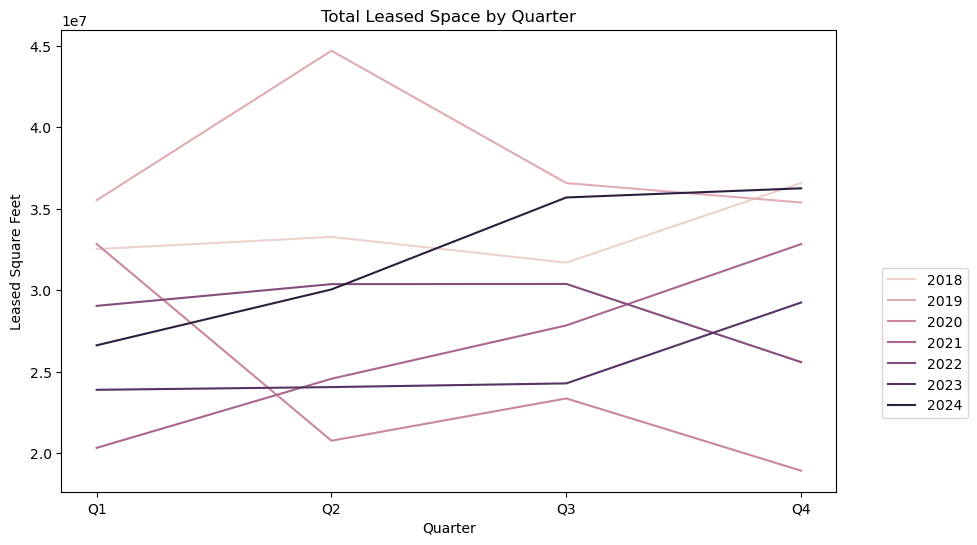

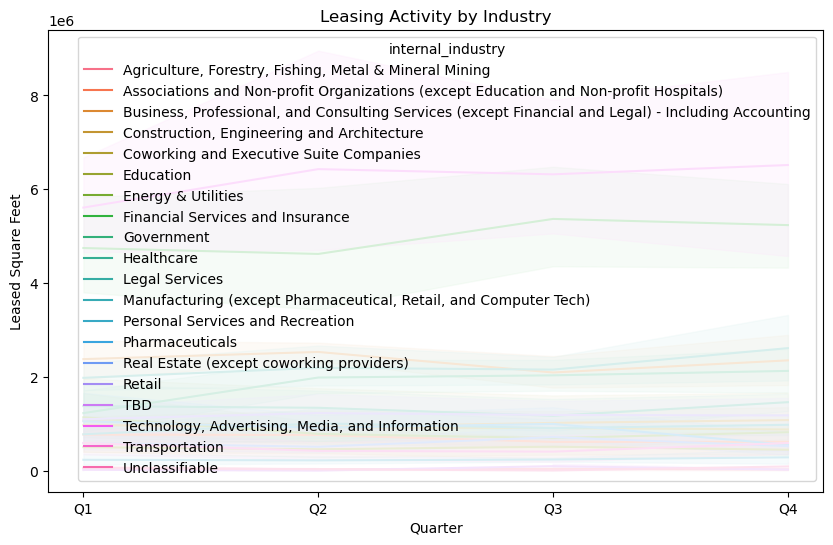

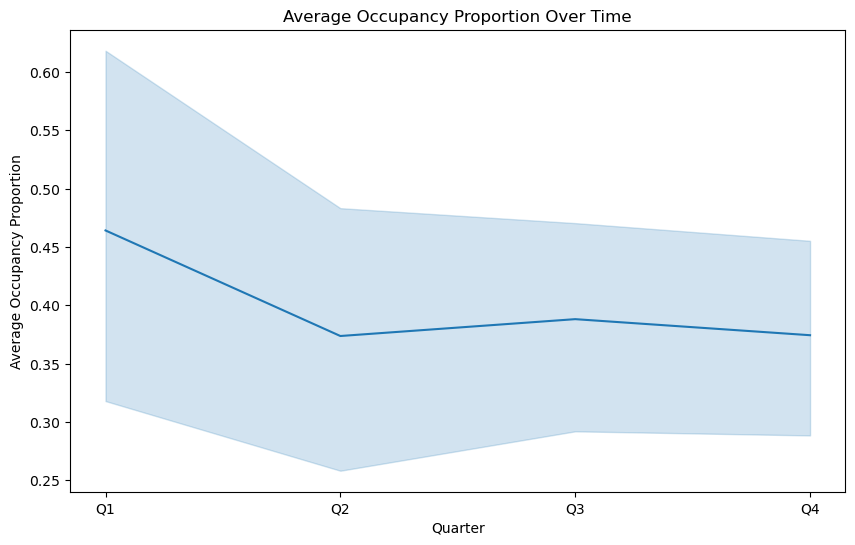

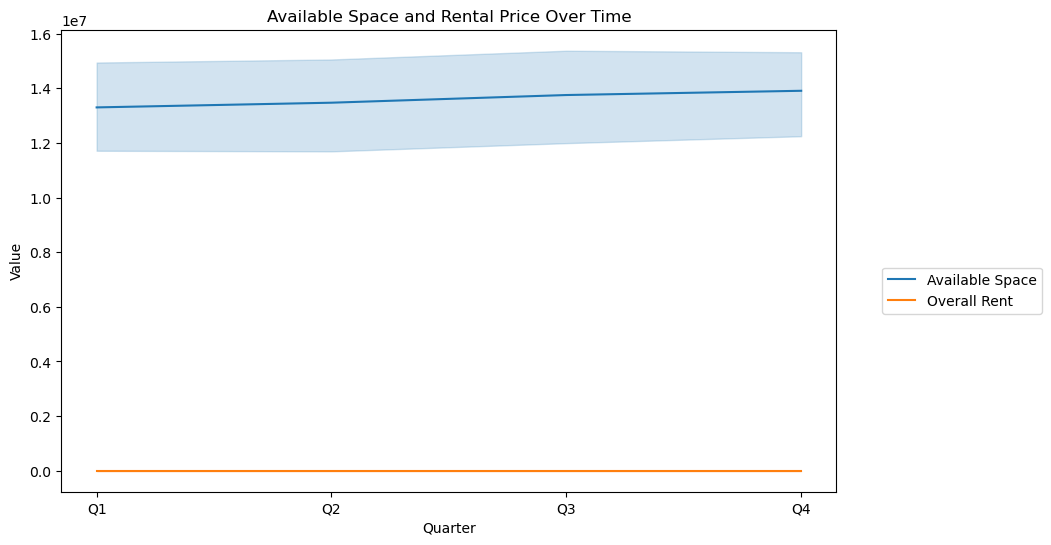

ValueError: Could not interpret value `quarter` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
leases = pd.read_csv("Leases.csv")
major_market_occupancy = pd.read_csv("Major Market Occupancy Data.csv")
price_availability = pd.read_csv("Price and Availability Data.csv")
unemployment = pd.read_csv("Unemployment.csv")

# Convert date columns to datetime format if necessary
leases['monthsigned'] = pd.to_datetime(leases['monthsigned'], errors='coerce')

# Check for missing data and handle appropriately (e.g., drop or fill missing values)
leases = leases.dropna(subset=['leasedSF', 'market', 'company_name'])
major_market_occupancy = major_market_occupancy.dropna()
price_availability = price_availability.dropna()
unemployment = unemployment.dropna()

# Ensure numeric columns are of correct type
leases['leasedSF'] = pd.to_numeric(leases['leasedSF'], errors='coerce')

leases_grouped = leases.groupby(['year', 'quarter'])['leasedSF'].sum().reset_index()

# Plot Total Leased Space by Quarter
# Plot Total Leased Space by Quarter
plt.figure(figsize=(10, 6))
sns.lineplot(data=leases_grouped, x='quarter', y='leasedSF', hue='year')
plt.title('Total Leased Space by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Leased Square Feet')

# Move the legend to the side (adjust the x coordinate for better positioning)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.show()

leases_industry_grouped = leases.groupby(['year', 'quarter', 'internal_industry'])['leasedSF'].sum().reset_index()

# Plot Leasing Activity by Industry
plt.figure(figsize=(10, 6))
sns.lineplot(data=leases_industry_grouped, x='quarter', y='leasedSF', hue='internal_industry')
plt.title('Leasing Activity by Industry')
plt.xlabel('Quarter')
plt.ylabel('Leased Square Feet')
plt.show()

occupancy_grouped = major_market_occupancy.groupby(['year', 'quarter'])['avg_occupancy_proportion'].mean().reset_index()

# Plot Average Occupancy Proportion Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=occupancy_grouped, x='quarter', y='avg_occupancy_proportion')
plt.title('Average Occupancy Proportion Over Time')
plt.xlabel('Quarter')
plt.ylabel('Average Occupancy Proportion')
plt.show()

# Fixing the error for selecting multiple columns and calculate mean for 'available_space' and 'overall_rent'
price_availability_grouped = price_availability.groupby(['year', 'quarter'])[['available_space', 'overall_rent']].mean().reset_index()

# Plot Available Space and Rental Price Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_availability_grouped, x='quarter', y='available_space', label='Available Space')
sns.lineplot(data=price_availability_grouped, x='quarter', y='overall_rent', label='Overall Rent')
plt.title('Available Space and Rental Price Over Time')
plt.xlabel('Quarter')
plt.ylabel('Value')

# Move the legend to the side (adjust the x coordinate for better positioning)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.show()

unemployment_grouped = unemployment.groupby(['year', 'quarter'])['unemployment_rate'].mean().reset_index()

# Merge with leases data
leases_unemployment = pd.merge(leases_grouped, unemployment_grouped, on='year', how='left')

# Plot Leasing Activity vs. Unemployment Rate
plt.figure(figsize=(10, 6))
sns.lineplot(data=leases_unemployment, x='quarter', y='leasedSF', label='Leased Space')
sns.lineplot(data=leases_unemployment, x='quarter', y='unemployment_rate', label='Unemployment Rate')
plt.title('Leasing Activity vs. Unemployment Rate')
plt.xlabel('Quarter')
plt.ylabel('Value')

# Move the legend to the side (adjust the x coordinate for better positioning)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.show()

C:\Users\arshi\AppData\Local\Temp\ipykernel_15712\2322978165.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side


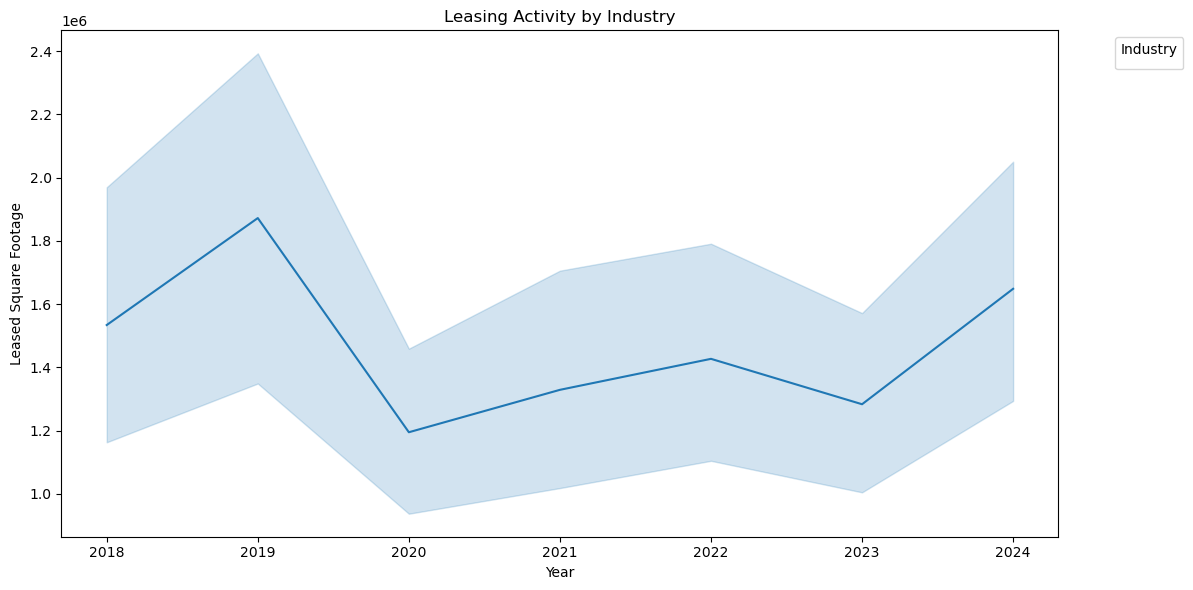

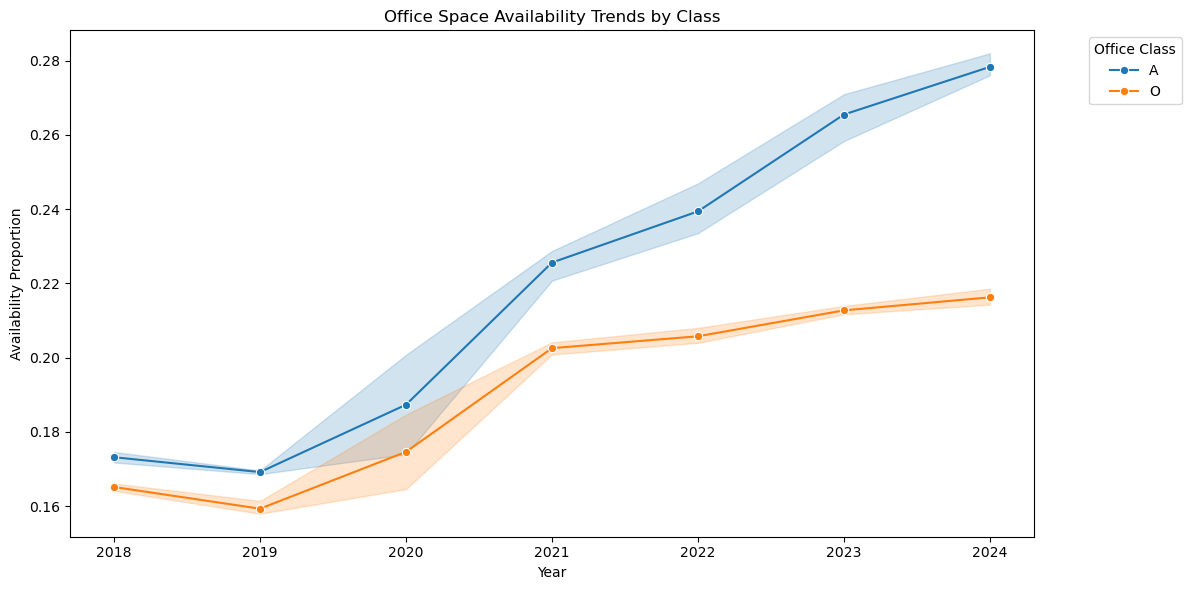

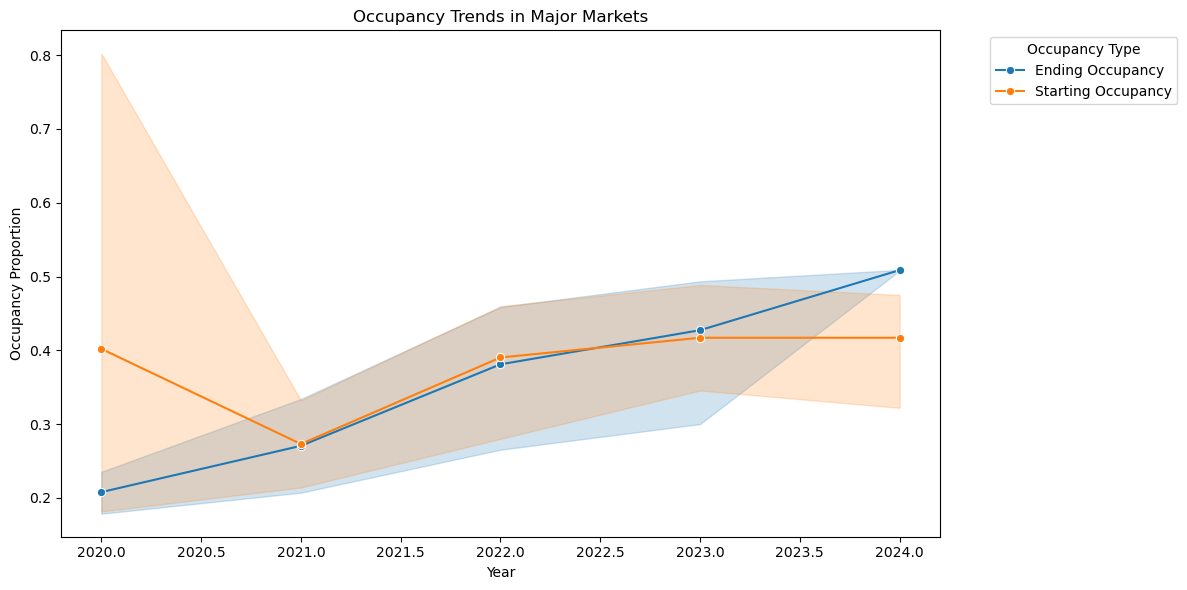

C:\Users\arshi\AppData\Local\Temp\ipykernel_15712\2322978165.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Unemployment Rate', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side


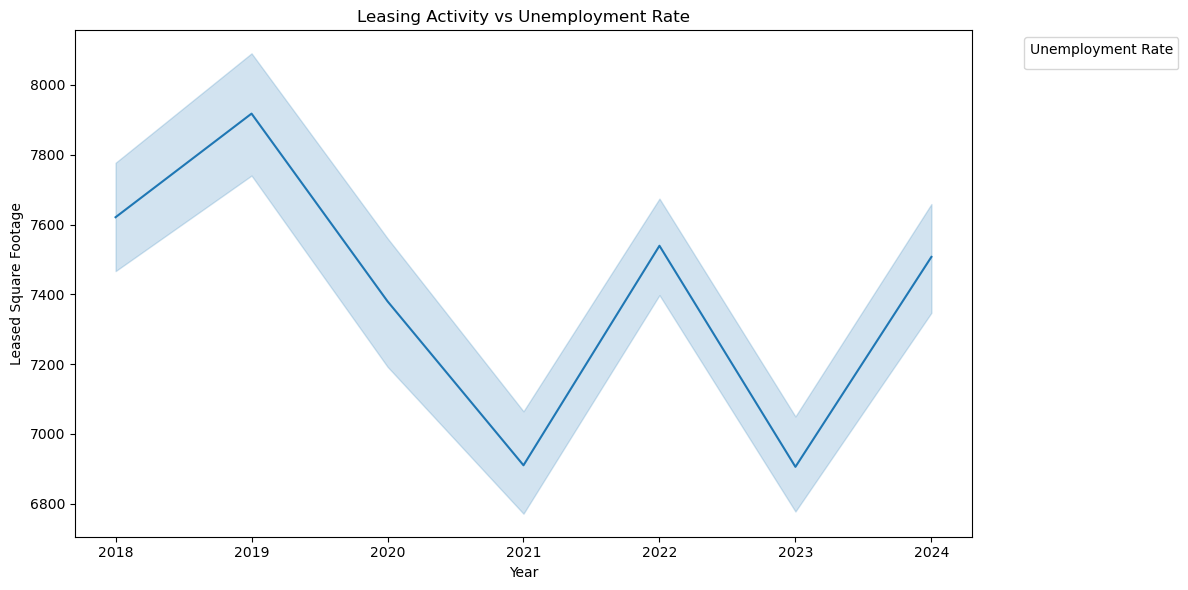

Correlation between Leased Space and Unemployment Rate:
                   leasedSF  unemployment_rate
leasedSF           1.000000          -0.071627
unemployment_rate -0.071627           1.000000


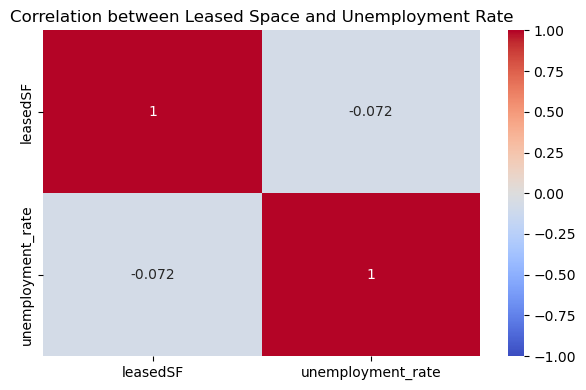

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
leases = pd.read_csv('Leases.csv')  # Assuming the file is named 'leases.csv'
price_availability = pd.read_csv('price and Availability Data.csv')  # Assuming the file is named 'price_availability.csv'
major_market_occupancy = pd.read_csv('Major Market Occupancy Data.csv')  # Assuming the file is named 'major_market_occupancy.csv'
unemployment = pd.read_csv('Unemployment.csv')  # Assuming the file is named 'unemployment.csv'

# Inspect data structure (for debugging)
# print(leases.head())
# print(price_availability.head())
# print(major_market_occupancy.head())
# print(unemployment.head())

# ---- Step 1: Group by industry and analyze leased space trends ----
# Group by industry and aggregate leased space (leasedSF)
industry_trends = leases.groupby(['year', 'quarter', 'internal_industry'])['leasedSF'].sum().reset_index()

# Plot leasing trends by industry
plt.figure(figsize=(12, 6))
sns.lineplot(data=industry_trends, x='year', y='leasedSF')
plt.title('Leasing Activity by Industry')
plt.xlabel('Year')
plt.ylabel('Leased Square Footage')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.tight_layout()
plt.show()

# ---- Step 2: Analyze price and availability trends ----
# Group by market, year, and internal_class to analyze availability and rent prices
price_availability_trends = price_availability.groupby(['year', 'quarter', 'internal_class'])[['available_space', 'availability_proportion', 'internal_class_rent']].mean().reset_index()

# Plot price and availability trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_availability_trends, x='year', y='availability_proportion', hue='internal_class', marker='o')
plt.title('Office Space Availability Trends by Class')
plt.xlabel('Year')
plt.ylabel('Availability Proportion')
plt.legend(title='Office Class', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.tight_layout()
plt.show()

# ---- Step 3: Analyze major market occupancy ----
# Plot occupancy rates across markets
occupancy_trends = major_market_occupancy.groupby(['year', 'quarter'])[['starting_occupancy_proportion', 'ending_occupancy_proportion']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=occupancy_trends, x='year', y='ending_occupancy_proportion', marker='o', label='Ending Occupancy')
sns.lineplot(data=occupancy_trends, x='year', y='starting_occupancy_proportion', marker='o', label='Starting Occupancy')
plt.title('Occupancy Trends in Major Markets')
plt.xlabel('Year')
plt.ylabel('Occupancy Proportion')
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.tight_layout()
plt.show()

# ---- Step 4: Analyze the effect of unemployment rates on leasing ----
# Merge the unemployment data with the leasing data to observe trends
leases_with_unemployment = pd.merge(leases, unemployment, how='left', on=['year', 'quarter', 'state'])

# Plot the effect of unemployment rate on leased square footage
plt.figure(figsize=(12, 6))
sns.lineplot(data=leases_with_unemployment, x='year', y='leasedSF')
plt.title('Leasing Activity vs Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Leased Square Footage')
plt.legend(title='Unemployment Rate', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend on the side
plt.tight_layout()
plt.show()

# ---- Step 5: Correlation analysis between leasing trends and economic indicators ----
# Correlation between leased space (industry trends) and unemployment rate
correlation_data = pd.merge(industry_trends, unemployment, how='left', on=['year', 'quarter'])
correlation = correlation_data[['leasedSF', 'unemployment_rate']].corr()
print("Correlation between Leased Space and Unemployment Rate:")
print(correlation)

# Optional: You could use seaborn's heatmap to visualize the correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Leased Space and Unemployment Rate')
plt.tight_layout()
plt.show()


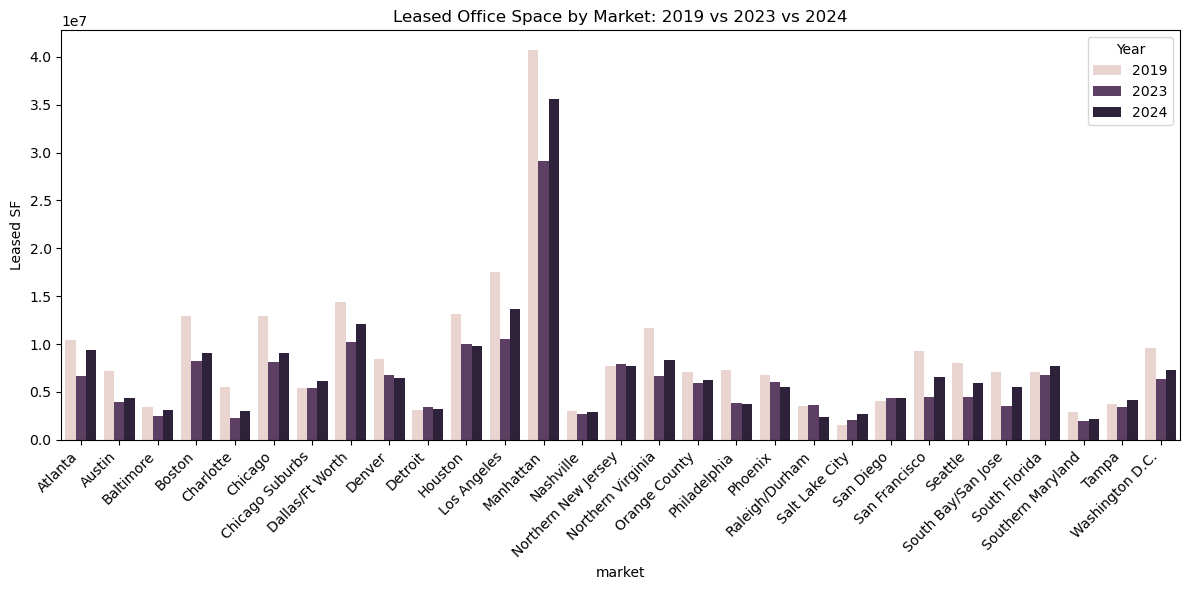

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
leases_df = pd.read_csv('Leases.csv')  # replace with your actual path

# Filter for years of interest
df_filtered = leases_df[leases_df['year'].isin([2019, 2023, 2024])]

# Group by market and year, summing leased square footage
leased_by_market = df_filtered.groupby(['market', 'year'])['leasedSF'].sum().reset_index()

# Pivot so markets are rows and years are columns
pivoted = leased_by_market.pivot(index='market', columns='year', values='leasedSF').fillna(0)

# Calculate percentage recovery relative to 2019
pivoted['Recovery_2023'] = (pivoted[2023] / pivoted[2019]) * 100
pivoted['Recovery_2024'] = (pivoted[2024] / pivoted[2019]) * 100

# Reset index for plotting
pivoted = pivoted.reset_index()

# Plot comparison
plt.figure(figsize=(12, 6))
pivoted_melted = pivoted.melt(id_vars='market', value_vars=[2019, 2023, 2024],
                               var_name='Year', value_name='Leased SF')

sns.barplot(data=pivoted_melted, x='market', y='Leased SF', hue='Year')
plt.xticks(rotation=45, ha='right')
plt.title('Leased Office Space by Market: 2019 vs 2023 vs 2024')
plt.tight_layout()
plt.show()


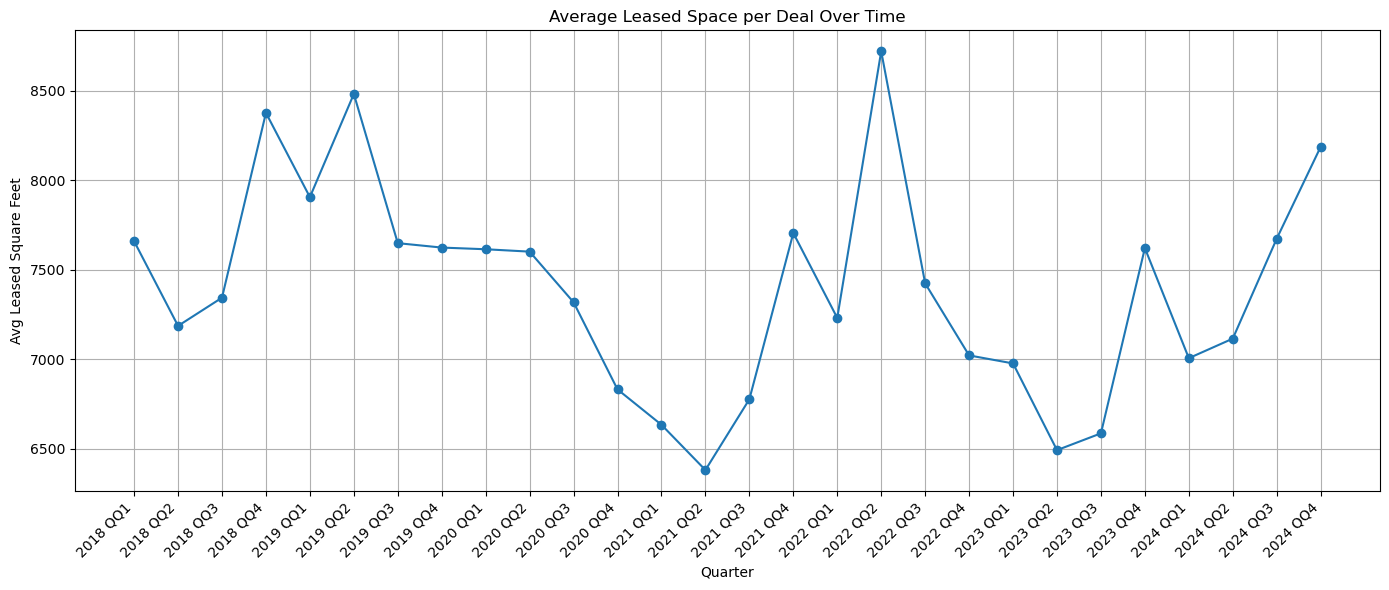

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load lease data
df = pd.read_csv('Leases.csv')  # Replace with your actual path

# Group by year and quarter, and calculate average leased square footage
avg_leased_sf = df.groupby(['year', 'quarter'])['leasedSF'].mean().reset_index()

# Create a time column for easier plotting
avg_leased_sf['time'] = avg_leased_sf['year'].astype(str) + ' Q' + avg_leased_sf['quarter'].astype(str)

# Sort time chronologically
avg_leased_sf = avg_leased_sf.sort_values(by=['year', 'quarter'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(avg_leased_sf['time'], avg_leased_sf['leasedSF'], marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Average Leased Space per Deal Over Time')
plt.xlabel('Quarter')
plt.ylabel('Avg Leased Square Feet')
plt.tight_layout()
plt.grid(True)
plt.show()


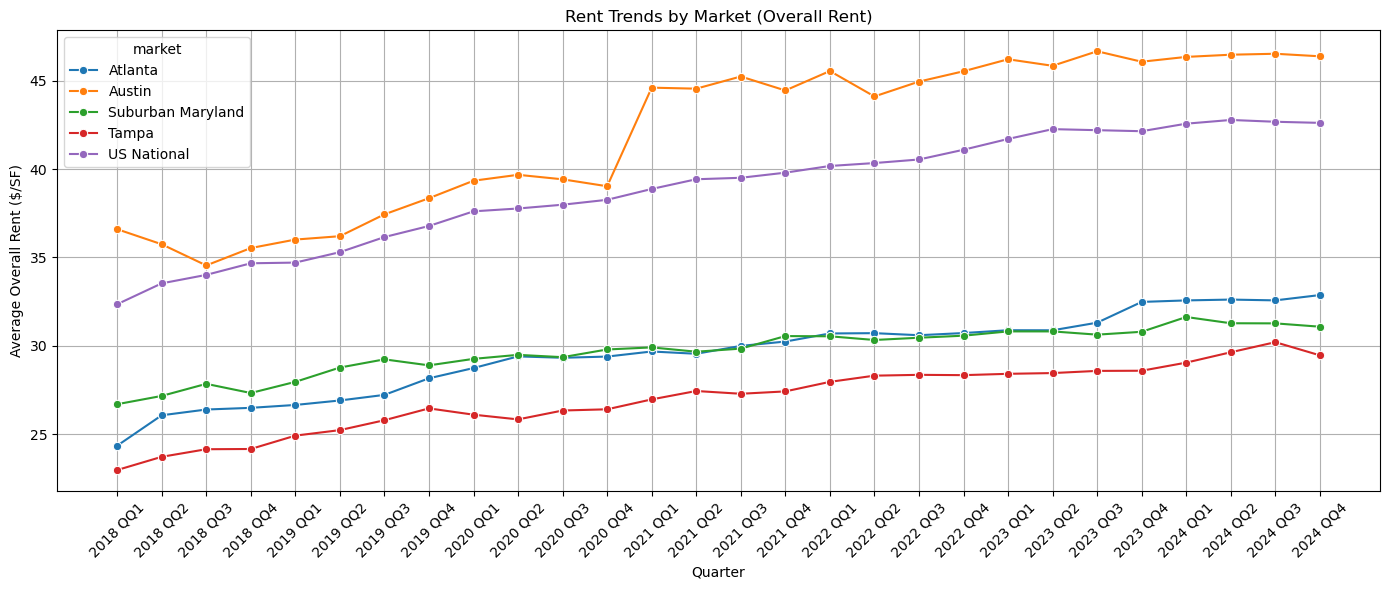

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your price data
df = pd.read_csv('Price and Availability Data.csv')  # replace with actual path

# Filter to recent years (optional, e.g., 2018–2024)
df = df[df['year'] >= 2018]

# Create a time column for easier plotting
df['time'] = df['year'].astype(str) + ' Q' + df['quarter'].astype(str)

# Group by time and submarket, calculate average rent
avg_rent = df.groupby(['time', 'market'])[['internal_class_rent', 'overall_rent']].mean().reset_index()

# Plot: Rent trend over time by submarket (can limit to a few for readability)
top_markets = avg_rent['market'].value_counts().index[:5]  # top 5 markets
filtered = avg_rent[avg_rent['market'].isin(top_markets)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered, x='time', y='overall_rent', hue='market', marker='o')
plt.xticks(rotation=45)
plt.title('Rent Trends by Market (Overall Rent)')
plt.xlabel('Quarter')
plt.ylabel('Average Overall Rent ($/SF)')
plt.tight_layout()
plt.grid(True)
plt.show()

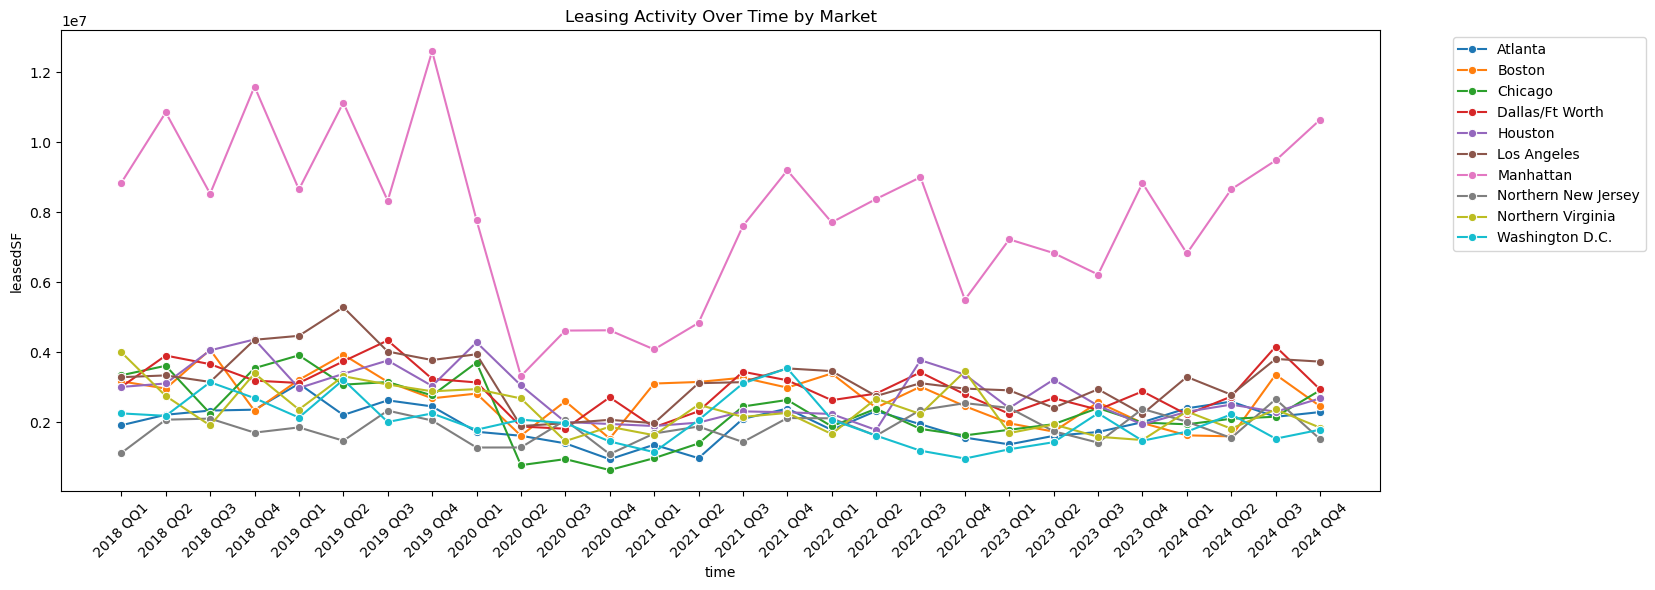

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

leases = pd.read_csv('Leases.csv')
# Combine year and quarter for a proper timeline
leases['time'] = leases['year'].astype(str) + ' Q' + leases['quarter'].astype(str)

# Group and sum leased square footage by market and time
market_trends = leases.groupby(['time', 'market'])['leasedSF'].sum().reset_index()

# Limit to top 10 markets by total leased space overall
top_markets = market_trends.groupby('market')['leasedSF'].sum().nlargest(10).index
filtered = market_trends[market_trends['market'].isin(top_markets)]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered, x='time', y='leasedSF', hue='market', marker='o')
plt.title('Leasing Activity Over Time by Market')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Index(['year', 'quarter', 'monthsigned', 'market', 'building_name',
       'building_id', 'address', 'region', 'city', 'state', 'zip',
       'internal_submarket', 'internal_class', 'leasedSF', 'company_name',
       'internal_industry', 'transaction_type', 'internal_market_cluster',
       'costarID', 'space_type', 'CBD_suburban', 'RBA', 'available_space',
       'availability_proportion', 'internal_class_rent', 'overall_rent',
       'direct_available_space', 'direct_availability_proportion',
       'direct_internal_class_rent', 'direct_overall_rent',
       'sublet_available_space', 'sublet_availability_proportion',
       'sublet_internal_class_rent', 'sublet_overall_rent', 'leasing'],
      dtype='object')


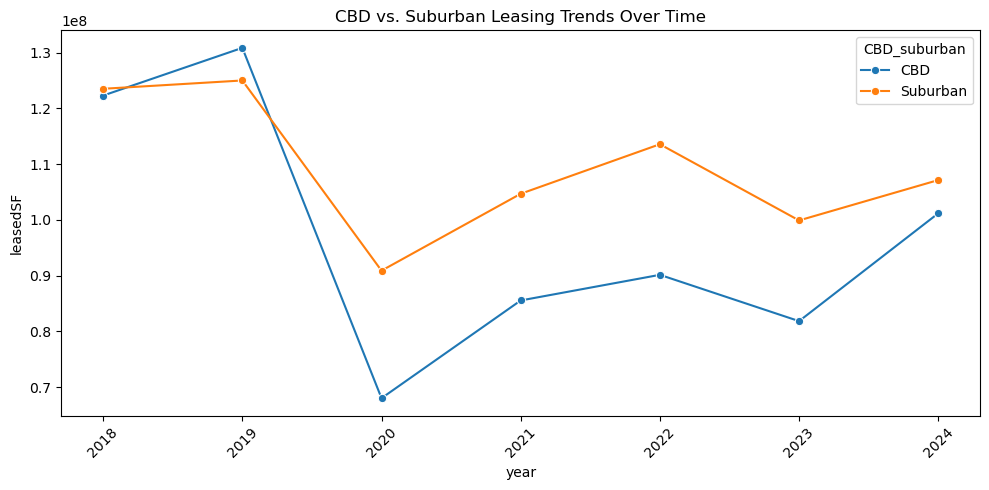

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

leases = pd.read_csv('Leases.csv')

# Group by time and CBD_suburban field
cbd_trends = leases.groupby(['year', 'CBD_suburban'])['leasedSF'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=cbd_trends, x='year', y='leasedSF', hue='CBD_suburban', marker='o')
plt.title('CBD vs. Suburban Leasing Trends Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


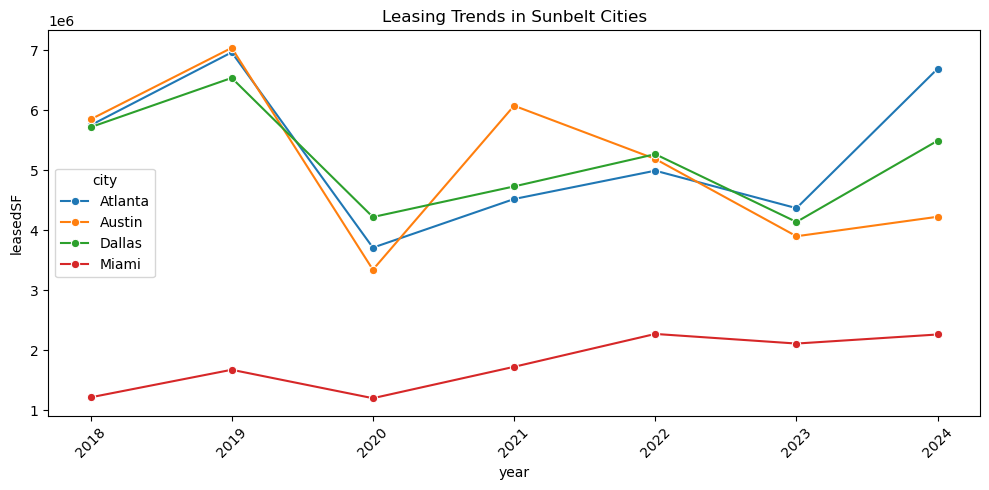

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

leases = pd.read_csv('Leases.csv')

sunbelt_cities = ['Austin', 'Atlanta', 'Miami', 'Dallas']

# Filter for Sunbelt cities
sunbelt_leases = leases[leases['city'].isin(sunbelt_cities)]
sunbelt_trends = sunbelt_leases.groupby(['year', 'city'])['leasedSF'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=sunbelt_trends, x='year', y='leasedSF', hue='city', marker='o')
plt.title('Leasing Trends in Sunbelt Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

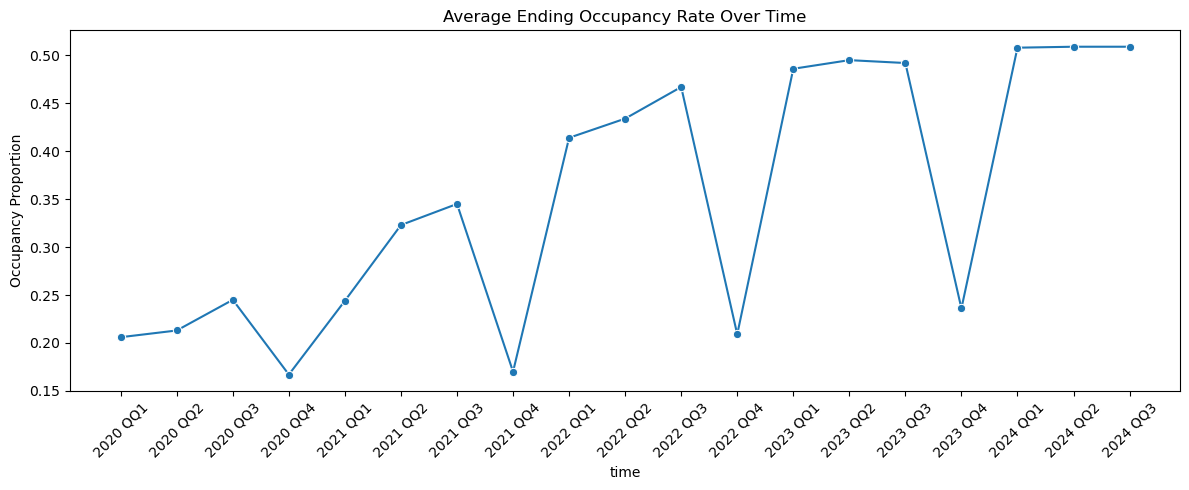

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

occupancy = pd.read_csv("Major Market Occupancy Data.csv")

# Create time column
occupancy['time'] = occupancy['year'].astype(str) + ' Q' + occupancy['quarter'].astype(str)

# Aggregate by time (average across all markets, or filter for a specific market if needed)
avg_occupancy = occupancy.groupby('time')['ending_occupancy_proportion'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_occupancy, x='time', y='ending_occupancy_proportion', marker='o')
plt.title('Average Ending Occupancy Rate Over Time')
plt.xticks(rotation=45)
plt.ylabel('Occupancy Proportion')
plt.tight_layout()
plt.show()


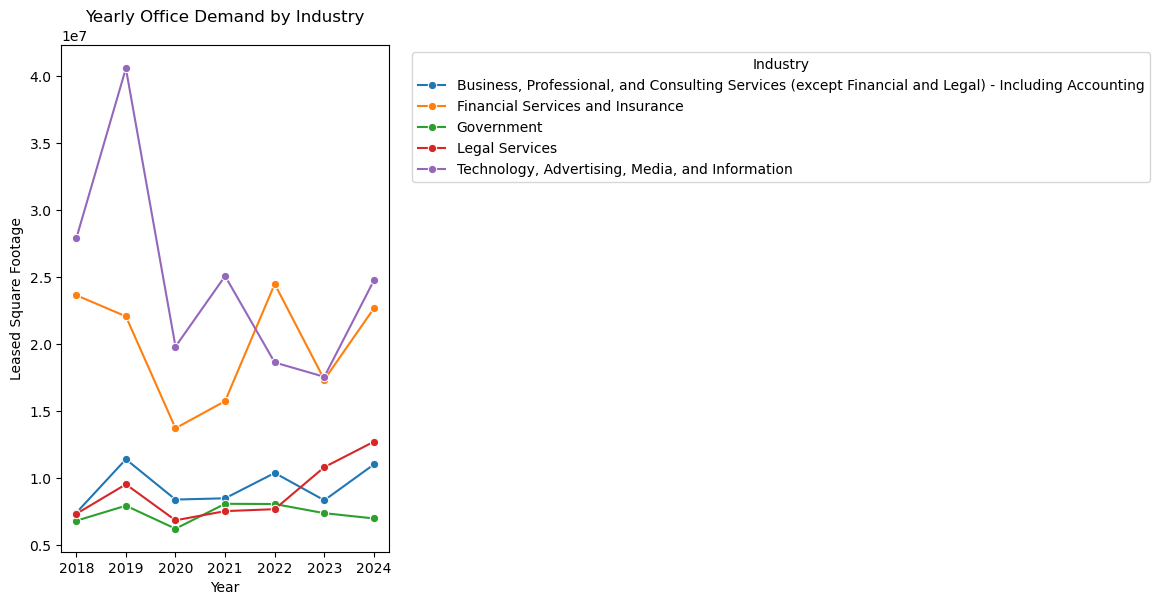

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

leases = pd.read_csv("Leases.csv")
occupancy = pd.read_csv("Major Market Occupancy Data.csv")
price_avail = pd.read_csv("Price and Availability Data.csv")
unemployment = pd.read_csv("Unemployment.csv")

# Create a 'time' column combining year and quarter
leases['time'] = leases['year'].astype(str) + ' Q' + leases['quarter'].astype(str)

# Group by time and industry, summing leased square footage
industry_demand_yearly = leases.groupby(['year', 'internal_industry'])['leasedSF'].sum().reset_index()

# Get top industries by total leased space
top_industries = industry_demand_yearly.groupby('internal_industry')['leasedSF'].sum().nlargest(5).index

# Filter to only include top industries
filtered_demand = industry_demand_yearly[industry_demand_yearly['internal_industry'].isin(top_industries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_demand, x='year', y='leasedSF', hue='internal_industry', marker='o')

plt.title('Yearly Office Demand by Industry')
plt.xlabel('Year')
plt.ylabel('Leased Square Footage')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')  # legend on side
plt.tight_layout()
plt.show()


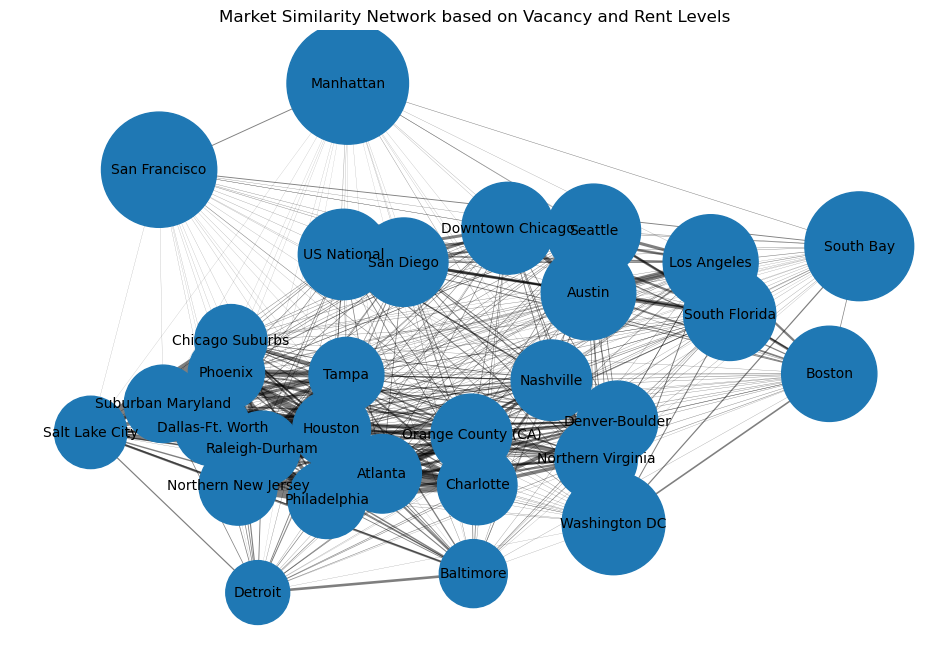

In [153]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("Price and Availability Data.csv")

# You can filter for certain years or classes if needed
df = df[df['year'] >= 2023]

# Select relevant columns (markets, vacancy, rent levels)
df_network = df[['market', 'availability_proportion', 'overall_rent']].dropna()

# Create a graph
G = nx.Graph()

# Add nodes (Markets)
for market in df_network['market'].unique():
    G.add_node(market)

# Add edges (connections between markets based on similarity in rent levels and vacancy rates)
for i, row1 in df_network.iterrows():
    for j, row2 in df_network.iterrows():
        if row1['market'] != row2['market']:
            # Calculate a "similarity score" (e.g., inverse of the difference in vacancy and rent)
            vacancy_diff = abs(row1['availability_proportion'] - row2['availability_proportion'])
            rent_diff = abs(row1['overall_rent'] - row2['overall_rent'])
            similarity_score = 1 / (vacancy_diff + rent_diff + 1e-5)  # Add a small constant to avoid division by zero
            
            # Add edge between markets with similarity score as weight
            G.add_edge(row1['market'], row2['market'], weight=similarity_score)

# Plot the graph
plt.figure(figsize=(12, 8))

# Node size based on the overall rent level (optional)
node_sizes = df_network.groupby('market')['overall_rent'].mean().to_dict()
node_sizes = {k: 100 * v for k, v in node_sizes.items()}  # Scale the sizes for better visualization

# Edge width based on similarity score (more similar = thicker edge)
edge_widths = [G[u][v]['weight'] * 5 for u, v in G.edges()]

# Draw the graph
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Spring layout for better spacing
nx.draw_networkx_nodes(G, pos, node_size=[node_sizes.get(node, 100) for node in G.nodes()])
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Market Similarity Network based on Vacancy and Rent Levels")
plt.axis('off')  # Turn off axis for clarity
plt.show()

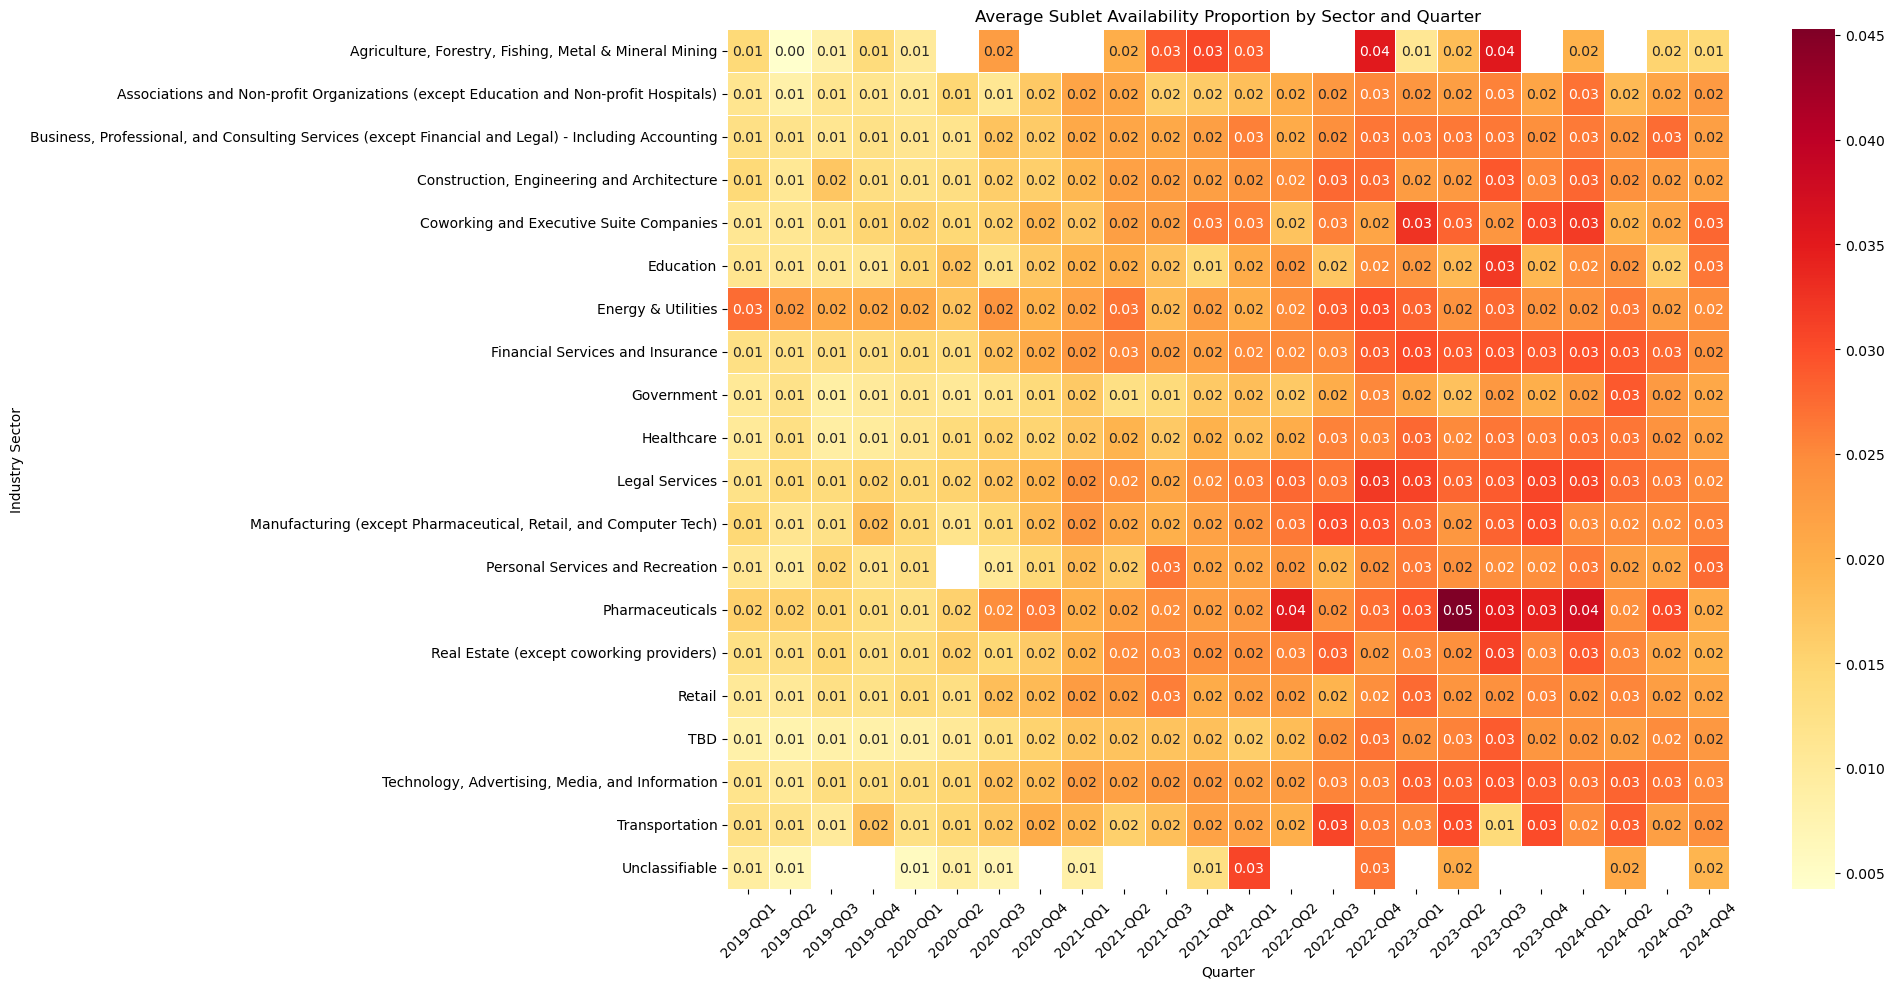

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load leases data
leases = pd.read_csv("Leases.csv")

# Optional: parse a date column if needed (year + quarter)
leases['quarter_str'] = 'Q' + leases['quarter'].astype(str)
leases['period'] = leases['year'].astype(str) + '-' + leases['quarter_str']

# Drop rows with missing values in key columns
filtered = leases.dropna(subset=['internal_industry', 'sublet_availability_proportion'])

# Group and pivot for heatmap
pivot_df = (
    filtered.groupby(['internal_industry', 'period'])['sublet_availability_proportion']
    .mean()
    .reset_index()
    .pivot(index='internal_industry', columns='period', values='sublet_availability_proportion')
)

plt.figure(figsize=(20, 10))  # Wider and taller
sns.heatmap(pivot_df, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".2f")

plt.title("Average Sublet Availability Proportion by Sector and Quarter")
plt.xlabel("Quarter")
plt.ylabel("Industry Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


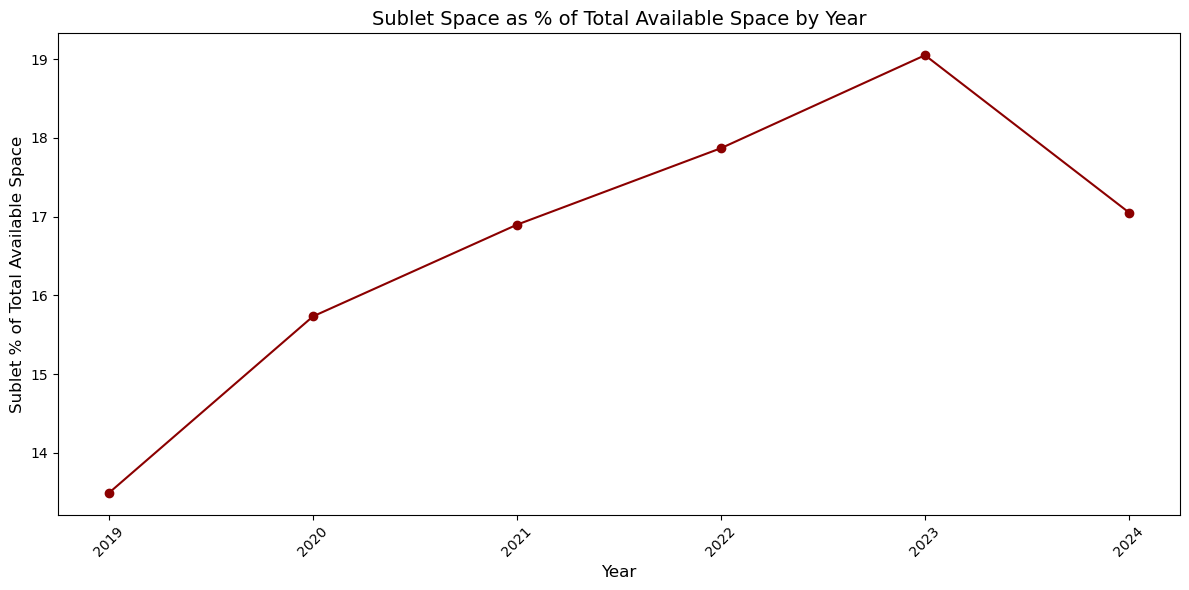

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Load price and availability data
pa = pd.read_csv("Price and Availability Data.csv")

# Drop rows with missing data
pa_filtered = pa.dropna(subset=['sublet_available_space', 'available_space'])

# Avoid division by zero
pa_filtered = pa_filtered[pa_filtered['available_space'] > 0]

# Compute sublet proportion as % of total available space
pa_filtered['sublet_pct_of_total'] = pa_filtered['sublet_available_space'] / pa_filtered['available_space'] * 100

# Group by year and average across markets
yearly_trend = (
    pa_filtered.groupby('year')['sublet_pct_of_total']
    .mean()
    .reset_index()
    .sort_values('year')
)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_trend['year'], yearly_trend['sublet_pct_of_total'], marker='o', linestyle='-', color='darkred')

plt.title("Sublet Space as % of Total Available Space by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sublet % of Total Available Space", fontsize=12)
plt.xticks(yearly_trend['year'], rotation=45)
# plt.grid(True)  # optional
plt.tight_layout()
plt.show()


['Expansion' 'New' 'Relocation' 'Renewal' 'Restructure' 'Extension' 'TBD'
 'Renewal and Expansion' nan 'Sale - Leaseback']
['Relet' 'New' 'Sublet' nan]
Empty DataFrame
Columns: [Industry, Sublet Transactions]
Index: []


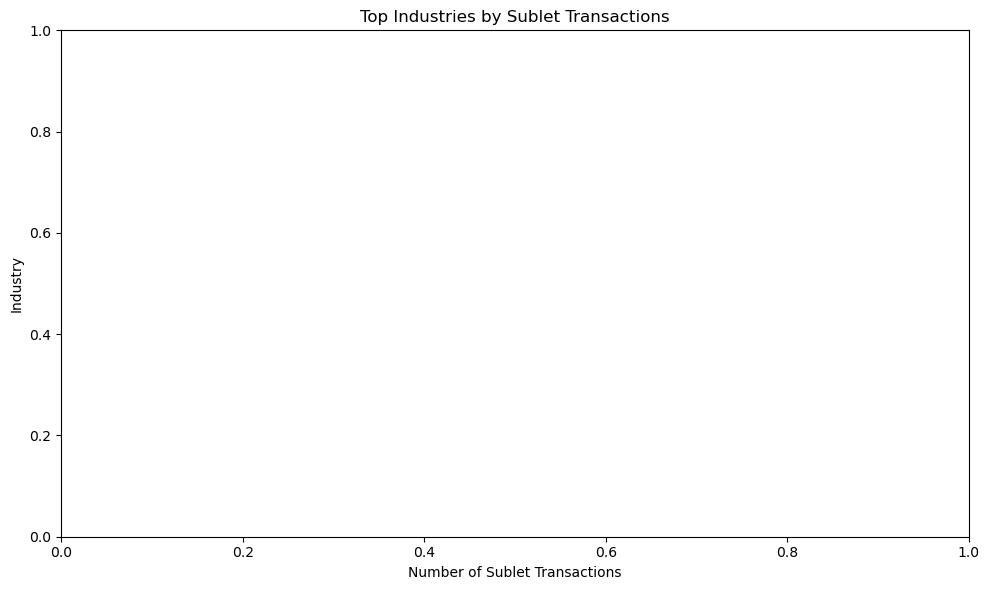

In [173]:
import pandas as pd

leases = pd.read_csv("Leases.csv")

# Explore unique values to confirm the sublet indicator
print(leases['transaction_type'].unique())
print(leases['space_type'].unique())

# Filter to sublet transactions (based on how sublets are labeled)
sublets = leases[leases['transaction_type'].str.contains("Sub", case=False, na=False)]

# Count the number of sublet transactions per industry
industry_counts = sublets['internal_industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Sublet Transactions']
print(industry_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=industry_counts.head(10), x='Sublet Transactions', y='Industry', palette='Reds_r')
plt.title("Top Industries by Sublet Transactions")
plt.xlabel("Number of Sublet Transactions")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


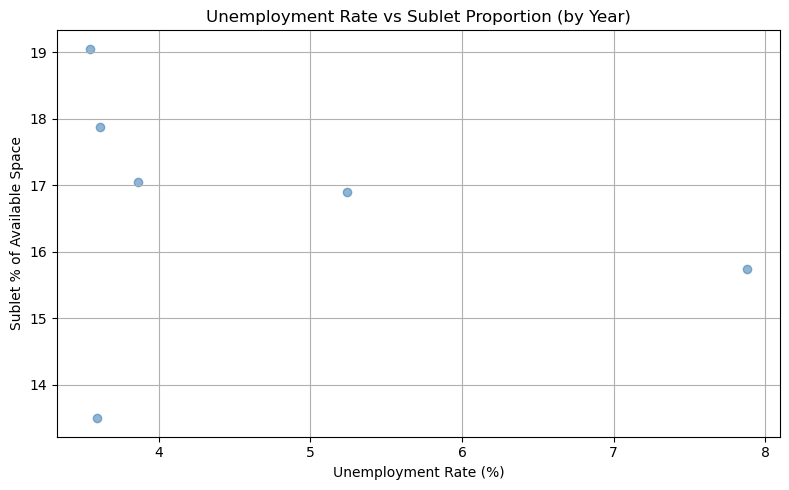

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your datasets
pa = pd.read_csv("Price and Availability Data.csv")
unemp = pd.read_csv("Unemployment.csv")

# Preprocess sublet data
pa_filtered = pa.dropna(subset=['sublet_available_space', 'available_space'])
pa_filtered = pa_filtered[pa_filtered['available_space'] > 0]
pa_filtered['sublet_pct'] = pa_filtered['sublet_available_space'] / pa_filtered['available_space'] * 100

# Average sublet % by year
sublet_by_year = pa_filtered.groupby('year')['sublet_pct'].mean().reset_index()

# Average unemployment by year (all states combined)
unemp_by_year = unemp.groupby('year')['unemployment_rate'].mean().reset_index()

# Merge the two datasets by year
merged = pd.merge(sublet_by_year, unemp_by_year, on='year')

# Simple scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(merged['unemployment_rate'], merged['sublet_pct'], color='steelblue', alpha=0.6)

plt.title("Unemployment Rate vs Sublet Proportion (by Year)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Sublet % of Available Space")
plt.grid(True)
plt.tight_layout()
plt.show()


sublet_available_space    73011
available_space           49144
dtype: int64
   year    GDP  sublet_proportion
0  2018  20.66                0.0
1  2018  20.66                0.0
2  2018  20.66                0.0
3  2018  20.66                0.0
4  2018  20.66                0.0


C:\Users\arshi\AppData\Local\Temp\ipykernel_15712\1118180038.py:27: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





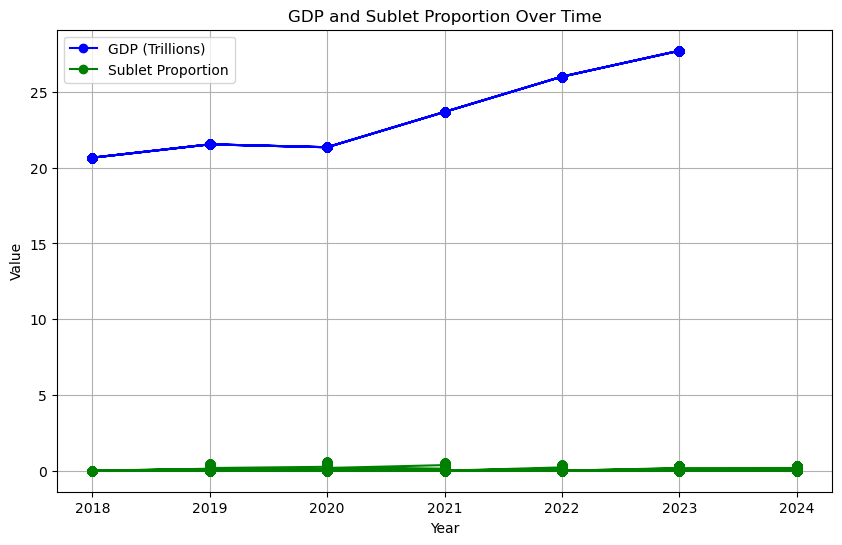

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the leases data (commercial real estate data)
leases = pd.read_csv("Leases.csv")

# GDP data
gdp_data = {
    'year': [2018, 2019, 2020, 2021, 2022, 2023],
    'GDP': [20.66, 21.54, 21.35, 23.68, 26.01, 27.72]  # In trillion USD
}
gdp_df = pd.DataFrame(gdp_data)

# Clean the GDP data by dropping duplicates for each year
gdp_df = gdp_df.drop_duplicates(subset=['year'])

# Merge GDP data with real estate data on 'year'
combined_df = pd.merge(leases, gdp_df[['year', 'GDP']], on='year', how='left')

# Check for missing values in 'sublet_available_space' and 'available_space'
print(combined_df[['sublet_available_space', 'available_space']].isna().sum())

# Handle missing or zero values before calculating sublet proportion
combined_df['sublet_proportion'] = combined_df['sublet_available_space'] / combined_df['available_space']

# If there are still NaN values, fill them with zero or another appropriate method
combined_df['sublet_proportion'].fillna(0, inplace=True)

# Check the merged data and calculated sublet proportion
print(combined_df[['year', 'GDP', 'sublet_proportion']].head())

# Plot the data for GDP and Sublet Proportion over time on the same graph
plt.figure(figsize=(10, 6))
plt.plot(combined_df['year'], combined_df['GDP'], marker='o', linestyle='-', color='b', label='GDP (Trillions)')
plt.plot(combined_df['year'], combined_df['sublet_proportion'], marker='o', linestyle='-', color='g', label='Sublet Proportion')
plt.title('GDP and Sublet Proportion Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Correlation between sublet availability and unemployment rate: -0.021


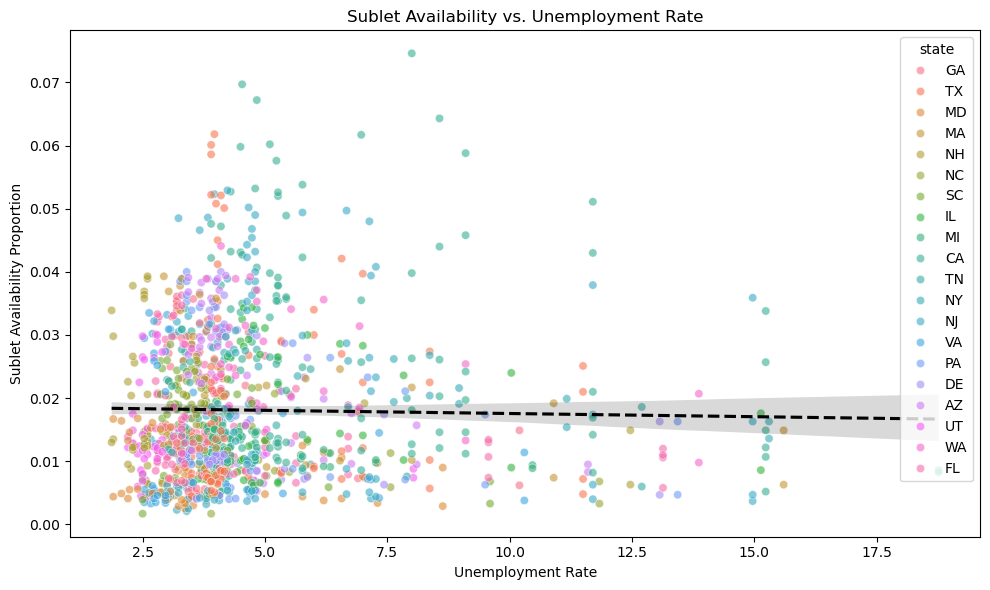

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure the dataframes are loaded
leases_df = pd.read_csv("Leases.csv")
price_df = pd.read_csv("Price and Availability Data.csv")
unemployment_df = pd.read_csv("Unemployment.csv")

# Step 2: Get state from leases_df using market
leases_subset = leases_df[['market', 'state']].drop_duplicates()

# Step 3: Merge state into price_df
price_df = pd.merge(price_df, leases_subset, on='market', how='left')

# Step 4: Select relevant sublet columns and drop missing values
sublet_df = price_df[['year', 'quarter', 'state', 'sublet_availability_proportion']].dropna()

# Step 5: Prepare unemployment data — ensure year, quarter, state are present
unemployment_df = unemployment_df.copy()
unemployment_df = unemployment_df[['year', 'quarter', 'state', 'unemployment_rate']]

# Step 6: Group unemployment by year/quarter/state to average monthly rates
unemp_grouped = unemployment_df.groupby(['year', 'quarter', 'state'], as_index=False)['unemployment_rate'].mean()

# Step 7: Merge sublet data with unemployment data
merged_df = pd.merge(sublet_df, unemp_grouped, on=['year', 'quarter', 'state'], how='inner')

# Step 8: Correlation analysis
correlation = merged_df['sublet_availability_proportion'].corr(merged_df['unemployment_rate'])
print(f"Correlation between sublet availability and unemployment rate: {correlation:.3f}")

# Step 9: Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='unemployment_rate', y='sublet_availability_proportion', hue='state', alpha=0.6)
sns.regplot(data=merged_df, x='unemployment_rate', y='sublet_availability_proportion', scatter=False, color='black', line_kws={'linestyle':'--'})
plt.title('Sublet Availability vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Sublet Availability Proportion')
plt.tight_layout()
plt.show()
